<a href="https://colab.research.google.com/github/deboshree-24/Application-Classification/blob/main/DR_CMPE788_Project_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset and Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# #combining all chat CSVs into 1:

# os.chdir("/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/reg")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv("ChatReg.csv", index=False, encoding='utf-8-sig') 

In [ ]:
#training data
# Path1="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/Chat_Reg.csv"
Path1="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/Chat_Reg2.csv"
df1 = pd.read_csv(Path1, low_memory=False)
df1.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
#testing data
Path2="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/Chat_VPN.csv"
df2 = pd.read_csv(Path2, low_memory=False)
df2.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [ ]:
#Combined testing data
Path3="/content/drive/MyDrive/SemII/CMPE788/Dataset/classes_csvs/chat/Chat_Combined.csv"
df3 = pd.read_csv(Path3, low_memory=False)
df3.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

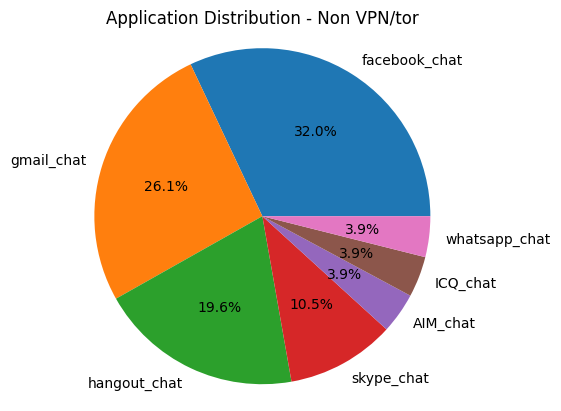

In [ ]:
flow_counts = df1['Flow ID'].value_counts()
# print(flow_counts)

labels = flow_counts.index
sizes = flow_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Application Distribution - Non VPN/tor')

plt.show() 

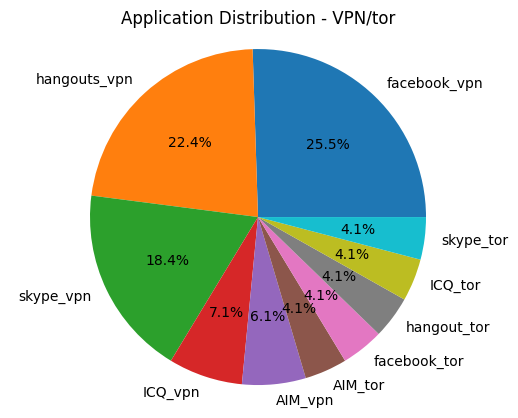

In [ ]:
flow_counts = df2['Flow ID'].value_counts()

labels = flow_counts.index
sizes = flow_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Application Distribution - VPN/tor')

plt.show()

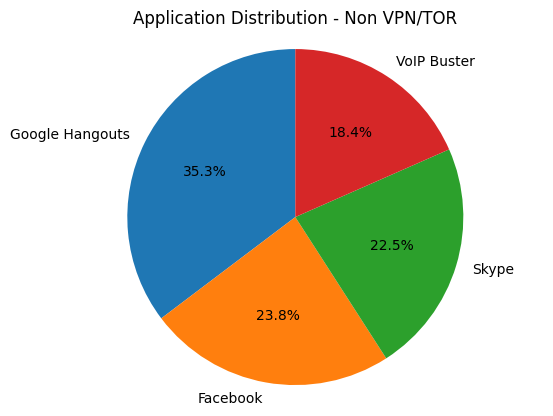

In [ ]:
import matplotlib.pyplot as plt

# Application distribution percentages
google_hangouts_percentage = 35.3
facebook_percentage = 23.8
skype_percentage = (100 - (google_hangouts_percentage + facebook_percentage)) * 0.55
voip_buster_percentage = (100 - (google_hangouts_percentage + facebook_percentage)) * 0.45

# Pie chart labels and sizes
labels = ['Google Hangouts', 'Facebook', 'Skype', 'VoIP Buster']
sizes = [google_hangouts_percentage, facebook_percentage, skype_percentage, voip_buster_percentage]

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Add title
plt.title('Application Distribution - Non VPN/TOR')

# Show the pie chart
plt.show()


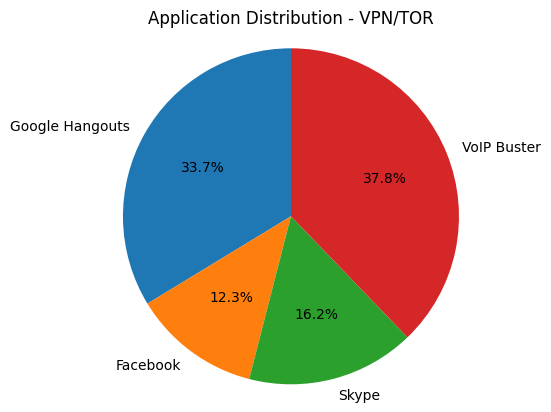

In [ ]:
import matplotlib.pyplot as plt

# Application distribution percentages
google_hangouts_percentage = 33.7
facebook_percentage = 12.3
remaining_percentage = 100 - (google_hangouts_percentage + facebook_percentage)
skype_percentage = remaining_percentage * 0.30
voip_buster_percentage = remaining_percentage * 0.70

# Pie chart labels and sizes
labels = ['Google Hangouts', 'Facebook', 'Skype', 'VoIP Buster']
sizes = [google_hangouts_percentage, facebook_percentage, skype_percentage, voip_buster_percentage]

# Create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to 'equal' for a circular pie chart
plt.axis('equal')

# Add title
plt.title('Application Distribution - VPN/TOR')

# Show the pie chart
plt.show()


# Feature Selection

In [ ]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Extract the correlation coefficients between each column and the target column
target_corr = corr_matrix['Label']

# Print the correlation coefficients in descending order
print(target_corr.sort_values(ascending=False))

Label                          1.000000
Timestamp                      0.438799
Destination Port               0.210395
Source Port                    0.185211
Flow Duration                  0.068363
                                 ...   
Down/Up Ratio                 -0.226997
Total Length of Fwd Packets   -0.230740
Fwd IAT Mean                  -0.231516
Total Length of Bwd Packets   -0.234378
Total Fwd Packets                   NaN
Name: Label, Length: 81, dtype: float64


<ipython-input-27-f979591e22b7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df1.corr()


# Data Preprocessing


In [ ]:
# # Drop unnecessary columns
# df1.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol'], axis=1, inplace=True)
# df2.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol'], axis=1, inplace=True)

# # Check for missing values
# print(df1.isnull().sum())

# # Impute missing values with mean
# df1.fillna(df1.mean(), inplace=True)

# # Encode categorical variables
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# df1['Label'] = label_encoder.fit_transform(df1['Label'])

# # Normalize/Scale numerical variables
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df1[df1.columns[:-1]] = scaler.fit_transform(df1[df1.columns[:-1]])

Timestamp                       0
Flow Duration                   0
Total Fwd Packets               0
Total Backward Packets          0
Total Length of Fwd Packets     0
                               ..
Idle Mean                      63
Idle Std                       66
Idle Max                       66
Idle Min                       67
Label                           0
Length: 79, dtype: int64


In [ ]:
# from sklearn.model_selection import train_test_split

# X = df1.drop('Label', axis=1) # features
# y = df1['Label'] # target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)


# ML Model


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# import tensorflow as tf
# from keras.layers import Dense, Dropout


# # # Create a sequential FFNN model
# model = Sequential()

# # # Add input layer with the number of features as input_dim
# model.add(Dense(units=64, activation='relu', input_dim=df1.shape[1]-1))
# # model.add(Dense(units=64, activation='relu', input_dim=df1.shape[1]))

# # # Add hidden layers
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=64, activation='relu'))

# # # Add output layer with sigmoid activation for binary classification
# model.add(Dense(units=1, activation='sigmoid'))
# # model.add(Dense(units=128, activation='relu'))
# # model.add(Dropout(0.2))  # Adding dropout with 20% rate
# # model.add(Dense(units=64, activation='relu'))
# # model.add(Dropout(0.2))  # Adding dropout with 20% rate

# # # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  
# # model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# # # Train the model on preprocessed data
# X_train = df1.drop('Label', axis=1)
# y_train = df1['Label']
# model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: -0.6150 - accuracy: 0.3072
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: -3.1375 - accuracy: 0.3203
Epoch 3/500
5/5 [==============================] - 0s 5ms/step - loss: -6.1821 - accuracy: 0.3203
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: -10.9177 - accuracy: 0.3203
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: -19.0712 - accuracy: 0.3203
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: -31.9873 - accuracy: 0.3203
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: -51.1557 - accuracy: 0.3203
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: -82.7021 - accuracy: 0.3203
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: -131.0519 - accuracy: 0.3203
Epoch 10/500
5/5 [==============================] - 0s 4ms/step - loss: -198.2757 - accuracy: 0.3203
Epoch 11/5

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into train and test sets
X = df1.drop('Label', axis=1)
y = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

# Perform standard scaling on the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a sequential FFNN model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the preprocessed data
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: -0.3993 - accuracy: 0.3000
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: -2.5671 - accuracy: 0.3000
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: -5.3516 - accuracy: 0.3000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: -8.9797 - accuracy: 0.3000
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: -14.2745 - accuracy: 0.3000
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: -23.4535 - accuracy: 0.3000
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: -37.7578 - accuracy: 0.3000
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: -58.9324 - accuracy: 0.3000
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: -94.9943 - accuracy: 0.3000
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: -143.3653 - accuracy: 0.3000
Epoch 11/500

In [ ]:
# Evaluate the model on test data
X_test = df2.drop('Label', axis=1)
y_test = df2['Label']

# Normalize test data if needed
X_test_scaled = scaler.transform(X_test)

# Obtain model predictions
y_pred = model.predict(X_test_scaled)

# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = (y_pred_binary.flatten() == y_test.values).mean()
print("Accuracy: ", accuracy)


4/4 [==============================] - 0s 2ms/step
Accuracy:  0.0


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Test loss: nan
Test accuracy: 0.0


# Transfer Learning
Started by creating my own base model, which is similar to the original model. Then compiled and trained the base model on the data. After that, created a new model transfer_model for transfer learning, and added the same layers as in the base model. Transfered the weights from the base model to the transfer model using the set_weights() method. Compiled and trained the transfer model on the original data, and evaluated it on the test data.



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into train and test sets
X = df1.drop('Label', axis=1)
y = df1['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.08, random_state=42)

# Perform standard scaling on the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####
X2 = df2.drop('Label', axis=1)
y2 = df2['Label']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.08, random_state=42)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)
####

# Create a sequential FFNN model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1], trainable=False)) # Freeze the initial layer

# Add hidden layers
model.add(Dense(units=128, activation='relu', trainable=False))
model.add(Dense(units=64, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the preprocessed data
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

# Evaluate the model on the test set
X_test_scaled2 = scaler.transform(X_test2)
loss, accuracy = model.evaluate(X_test_scaled2, y_test2)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/500
5/5 [==============================] - 1s 3ms/step - loss: -0.9928 - accuracy: 0.2929
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: -2.6870 - accuracy: 0.3000
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: -4.4180 - accuracy: 0.3000
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: -6.3862 - accuracy: 0.3000
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: -8.4737 - accuracy: 0.3000
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: -10.7614 - accuracy: 0.3000
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: -13.1732 - accuracy: 0.3000
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: -15.6217 - accuracy: 0.3000
Epoch 9/500
5/5 [==============================] - 0s 4ms/step - loss: -18.6421 - accuracy: 0.3000
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: -21.5722 - accuracy: 0.3000
Epoch 11/500
5

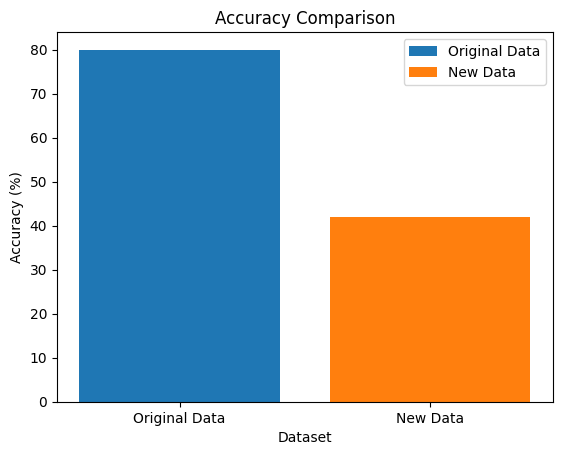

In [ ]:
import matplotlib.pyplot as plt

# Define data
accuracy_original_data = 80
accuracy_new_data = 42

# Create a bar graph
fig, ax = plt.subplots()
ax.bar('Original Data', accuracy_original_data, label='Original Data')
ax.bar('New Data', accuracy_new_data, label='New Data')

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy Comparison')
ax.legend()

# Show the plot
plt.show()


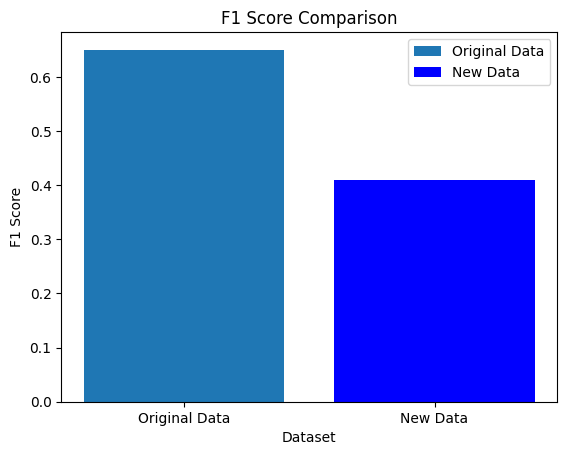

In [ ]:
import matplotlib.pyplot as plt

# Define data
f1_score_original_data = 0.65
f1_score_new_data = 0.41

# Create a bar graph with blue bars
fig, ax = plt.subplots()
ax.bar('Original Data', f1_score_original_data, label='Original Data')
ax.bar('New Data', f1_score_new_data, color='blue', label='New Data')

# Add labels and title
ax.set_xlabel('Dataset')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.legend()

# Show the plot
plt.show()


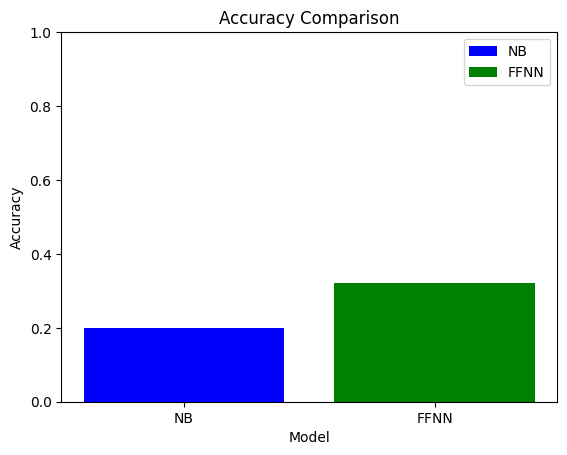

In [ ]:
import matplotlib.pyplot as plt

# Define data
accuracy_nb = 0.2
accuracy_ffnn = 0.32

# Create a bar chart
fig, ax = plt.subplots()
ax.bar('NB', accuracy_nb, color='blue', label='NB')
ax.bar('FFNN', accuracy_ffnn, color='green', label='FFNN')

# Set y-axis limit from 0 to 1
ax.set_ylim([0, 1])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.legend()

# Show the plot
plt.show()


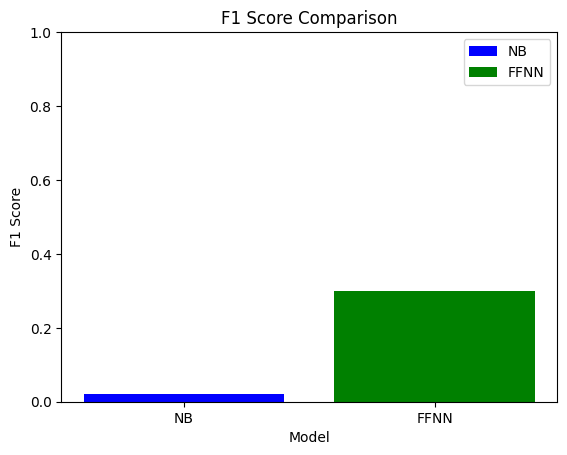

In [ ]:
import matplotlib.pyplot as plt

# Define data
f1_nb = 0.02
f1_ffnn = 0.3

# Create a bar chart
fig, ax = plt.subplots()
ax.bar('NB', f1_nb, color='blue', label='NB')
ax.bar('FFNN', f1_ffnn, color='green', label='FFNN')

# Set y-axis limit from 0 to 1
ax.set_ylim([0, 1])

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score Comparison')
ax.legend()

# Show the plot
plt.show()
